## Importación de librerias para análisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
file_path = r'C:\\Users\\bryan.mery\\Desktop\\Analisis CV  - TRL.xlsx'
sheet_name = 'Consolidado'

# Leer la hoja "Consolidado" del archivo
df = pd.read_excel(file_path, sheet_name=sheet_name)

## Excluir proyectos sin datos, es decir, se excluyen convocatorias 2.2022 CVC, 2.2022 CVID, 3.2022 CVC, 3.2022 CVID

In [2]:
# Eliminar filas con "No aplica" o "-"
df_filtered = df[~df['¿Cuál es el nivel actual de desarrollo de su propuesta o solución?'].isin(['No aplica', '-'])]
df_filtered = df_filtered[~df_filtered['Nivel actual de TRL'].isin(['No aplica', '-'])]

## Homologación : Estado de solución a TRL

In [3]:
# Tabla de homologación basada en la NASA
homologation_table = {
    'Concepto o idea': ['TRL 1 - Principios básicos estudiados', 'TRL 2 - Concepto tecnológico formulado', 'TRL 3 - Prueba de concepto experimental'],
    'Prototipo': ['TRL 4 -Tecnología validada en laboratorio'],
    'Prototipo Funcional': ['TRL 5 - Tecnología validada en un entorno relevante'],
    'Producto Mínimo Viable': ['TRL 6 - Modelo de sistema / subsistema o demostración de prototipo en un entorno relevante (terreno o espacio)', 'TRL 7 - Demostración del prototipo del sistema'],
    'Producto Funcional': ['TRL 8 - Sistema completo y certificado a través de pruebas y demostraciones'],
    'Escalando en ventas': ['TRL 9 - Sistema real probado en un entorno operacional real']
}


# # Tabla de homologación basada en LA COMISIÓN EUROPEA, Ministerio de Ciencia, Innovación y Universidades de España Y Departamento de Defensa de los EE.UU.:
# homologation_table = {
#     'Concepto o idea': ['TRL 1 - Principios básicos estudiados', 'TRL 2 - Concepto tecnológico formulado', 'TRL 3 - Prueba de concepto experimental'],
#     'Prototipo': ['TRL 4 -Tecnología validada en laboratorio'],
#     'Prototipo Funcional': ['TRL 5 - Tecnología validada en un entorno relevante'],
#     'Producto Mínimo Viable': ['TRL 6 - Modelo de sistema / subsistema o demostración de prototipo en un entorno relevante (terreno o espacio)'],
#     'Producto Funcional': ['TRL 7 - Demostración del prototipo del sistema', 'TRL 8 - Sistema completo y certificado a través de pruebas y demostraciones'],
#     'Escalando en ventas': ['TRL 9 - Sistema real probado en un entorno operacional real']
# }




# Función para verificar si coinciden los niveles fila por fila
def check_trl(row):
    nivel_desarrollo = row['¿Cuál es el nivel actual de desarrollo de su propuesta o solución?']
    nivel_trl = row['Nivel actual de TRL']
    trls_permitidos = homologation_table.get(nivel_desarrollo, [])
    return nivel_trl in trls_permitidos

# Aplicar la función a las filas filtradas
df_filtered['Coincide'] = df_filtered.apply(check_trl, axis=1)

## Resumen global

In [4]:
# Resumen global: Número de filas y porcentaje de coincidencias
total_filas = len(df_filtered)
filas_que_coinciden = df_filtered['Coincide'].sum()
porcentaje_coincidencia = (filas_que_coinciden / total_filas) * 100

# Mostrar el resumen global
print(f'Total de filas analizadas: {total_filas}')
print(f'Número de filas que coinciden: {filas_que_coinciden}')
print(f'Número de filas que no coinciden: {total_filas - filas_que_coinciden}')
print(f'Porcentaje de coincidencias: {porcentaje_coincidencia:.2f}%')

Total de filas analizadas: 1568
Número de filas que coinciden: 493
Número de filas que no coinciden: 1075
Porcentaje de coincidencias: 31.44%


## Gráfico de porcentaje coincidencias

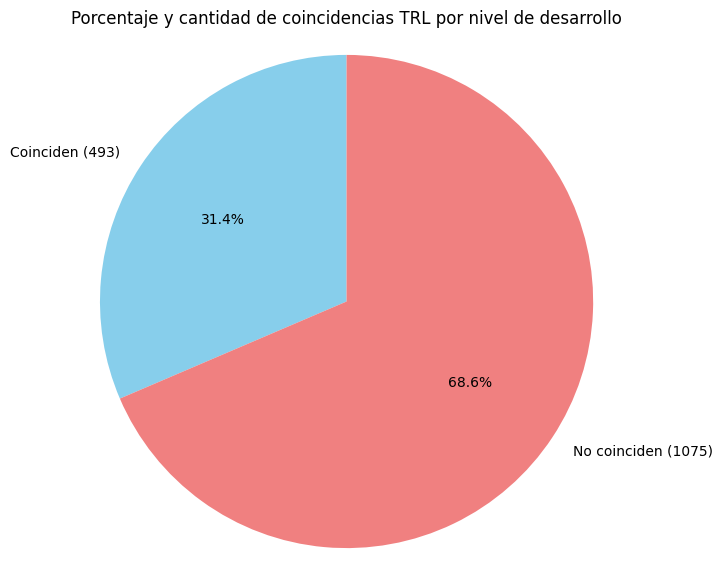

Número total de proyectos: 1568


In [5]:
# Graficar el porcentaje de coincidencia con cantidades
labels = ['Coinciden', 'No coinciden']
sizes = [filas_que_coinciden, total_filas - filas_que_coinciden]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=[f'{l} ({s})' for l, s in zip(labels, sizes)], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje y cantidad de coincidencias TRL por nivel de desarrollo')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()
total_proyectos_totales = len(df_filtered)
print(f'Número total de proyectos: {total_proyectos_totales}')


### Porcentaje de coincidencia de proyectos aprobados en comité (Se excluyen convocatorias 2.2022 CVC, 2.2022 CVID, 3.2022 CVC, 3.2022 CVID)

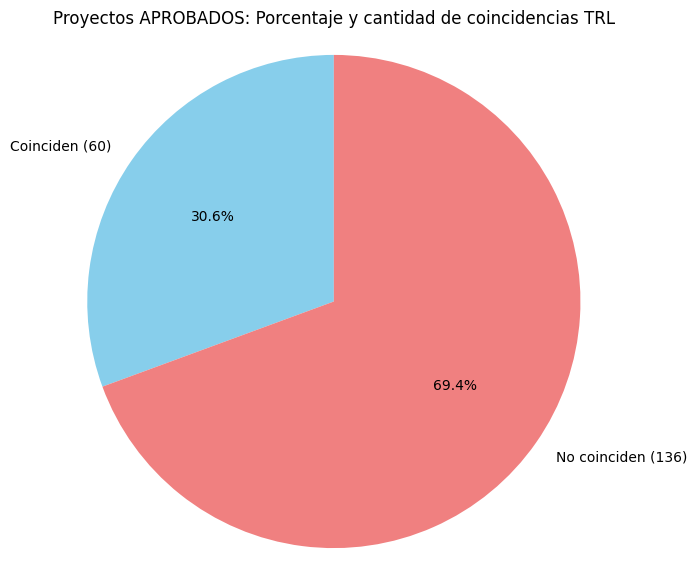

3 Ejemplos de proyectos que coinciden:
             Código  \
46     23CVI-245701   
1526  23CVC2-251623   
255    23CVC-245715   

     ¿Cuál es el nivel actual de desarrollo de su propuesta o solución?  \
46                                      Concepto o idea                   
1526                                          Prototipo                   
255                                           Prototipo                   

                            Nivel actual de TRL  Coincide  
46       TRL 2 - Concepto tecnológico formulado      True  
1526  TRL 4 -Tecnología validada en laboratorio      True  
255   TRL 4 -Tecnología validada en laboratorio      True  

3 Ejemplos de proyectos que no coinciden:
             Código  \
1546  23CVC2-251670   
438    24CVI-264655   
2505   23CVI-241467   

     ¿Cuál es el nivel actual de desarrollo de su propuesta o solución?  \
1546                             Producto Mínimo Viable                   
438                                      

In [6]:
# Filtrar los proyectos que tienen "APROBADO" en la columna G
df_aprobado = df_filtered[df_filtered['Estado'] == 'APROBADO']

# Contar los proyectos que coinciden y no coinciden
filas_que_coinciden = df_aprobado[df_aprobado['Coincide'] == True].shape[0]
filas_que_no_coinciden = df_aprobado[df_aprobado['Coincide'] == False].shape[0]

# Preparar los datos para el gráfico de torta
sizes = [filas_que_coinciden, filas_que_no_coinciden]
labels = ['Coinciden', 'No coinciden']
colors = ['skyblue', 'lightcoral']

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=[f'{l} ({s})' for l, s in zip(labels, sizes)], colors=colors, autopct='%1.1f%%', startangle=90)

# Título y ajustes
plt.title('Proyectos APROBADOS: Porcentaje y cantidad de coincidencias TRL')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()

# Seleccionar aleatoriamente 10 proyectos que coinciden
ejemplos_coinciden = df_filtered[df_filtered['Coincide'] == True][['Código', 
                                                                    '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                                                    'Nivel actual de TRL', 
                                                                    'Coincide']].sample(3)

# Seleccionar aleatoriamente 10 proyectos que no coinciden
ejemplos_no_coinciden = df_filtered[df_filtered['Coincide'] == False][['Código', 
                                                                       '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                                                       'Nivel actual de TRL', 
                                                                       'Coincide']].sample(3)

# Mostrar los ejemplos en consola
print("3 Ejemplos de proyectos que coinciden:")
print(ejemplos_coinciden)

print("\n3 Ejemplos de proyectos que no coinciden:")
print(ejemplos_no_coinciden)

### Porcentaje de coincidencia de proyectos POSTULADOS en comité (Se excluyen convocatorias 2.2022 CVC, 2.2022 CVID, 3.2022 CVC, 3.2022 CVID)

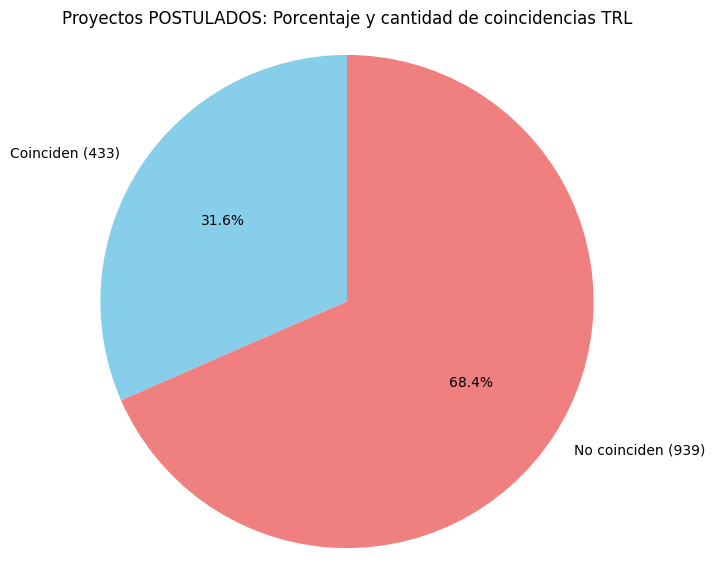

3 Ejemplos de proyectos que coinciden (POSTULADOS):
             Código  \
365    24CVC-264797   
883    24CVI-265050   
1631  23CVI2-251592   

     ¿Cuál es el nivel actual de desarrollo de su propuesta o solución?  \
365                                     Concepto o idea                   
883                              Producto Mínimo Viable                   
1631                             Producto Mínimo Viable                   

                                    Nivel actual de TRL  Coincide  
365               TRL 1 - Principios básicos estudiados      True  
883      TRL 7 - Demostración del prototipo del sistema      True  
1631  TRL 6 - Modelo de sistema / subsistema o demos...      True  

3 Ejemplos de proyectos que no coinciden (POSTULADOS):
             Código  \
615    24CVI-264691   
42     23CVC-245818   
1553  23CVI2-251743   

     ¿Cuál es el nivel actual de desarrollo de su propuesta o solución?  \
615                                     Concepto o idea   

In [73]:
# Filtrar los proyectos que tienen "POSTULADO" en la columna G
df_postulado = df_filtered[df_filtered['Estado'] == 'POSTULADO']

# Contar los proyectos que coinciden y no coinciden
filas_que_coinciden = df_postulado[df_postulado['Coincide'] == True].shape[0]
filas_que_no_coinciden = df_postulado[df_postulado['Coincide'] == False].shape[0]

# Preparar los datos para el gráfico de torta
sizes = [filas_que_coinciden, filas_que_no_coinciden]
labels = ['Coinciden', 'No coinciden']
colors = ['skyblue', 'lightcoral']

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=[f'{l} ({s})' for l, s in zip(labels, sizes)], colors=colors, autopct='%1.1f%%', startangle=90)

# Título y ajustes
plt.title('Proyectos POSTULADOS: Porcentaje y cantidad de coincidencias TRL')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()

# Seleccionar aleatoriamente 3 proyectos que coinciden
ejemplos_coinciden = df_postulado[df_postulado['Coincide'] == True][['Código', 
                                                                     '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                                                     'Nivel actual de TRL', 
                                                                     'Coincide']].sample(3)

# Seleccionar aleatoriamente 3 proyectos que no coinciden
ejemplos_no_coinciden = df_postulado[df_postulado['Coincide'] == False][['Código', 
                                                                         '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                                                         'Nivel actual de TRL', 
                                                                         'Coincide']].sample(3)

# Mostrar los ejemplos en consola
print("3 Ejemplos de proyectos que coinciden (POSTULADOS):")
print(ejemplos_coinciden)

print("\n3 Ejemplos de proyectos que no coinciden (POSTULADOS):")
print(ejemplos_no_coinciden)

<Figure size 1200x800 with 0 Axes>

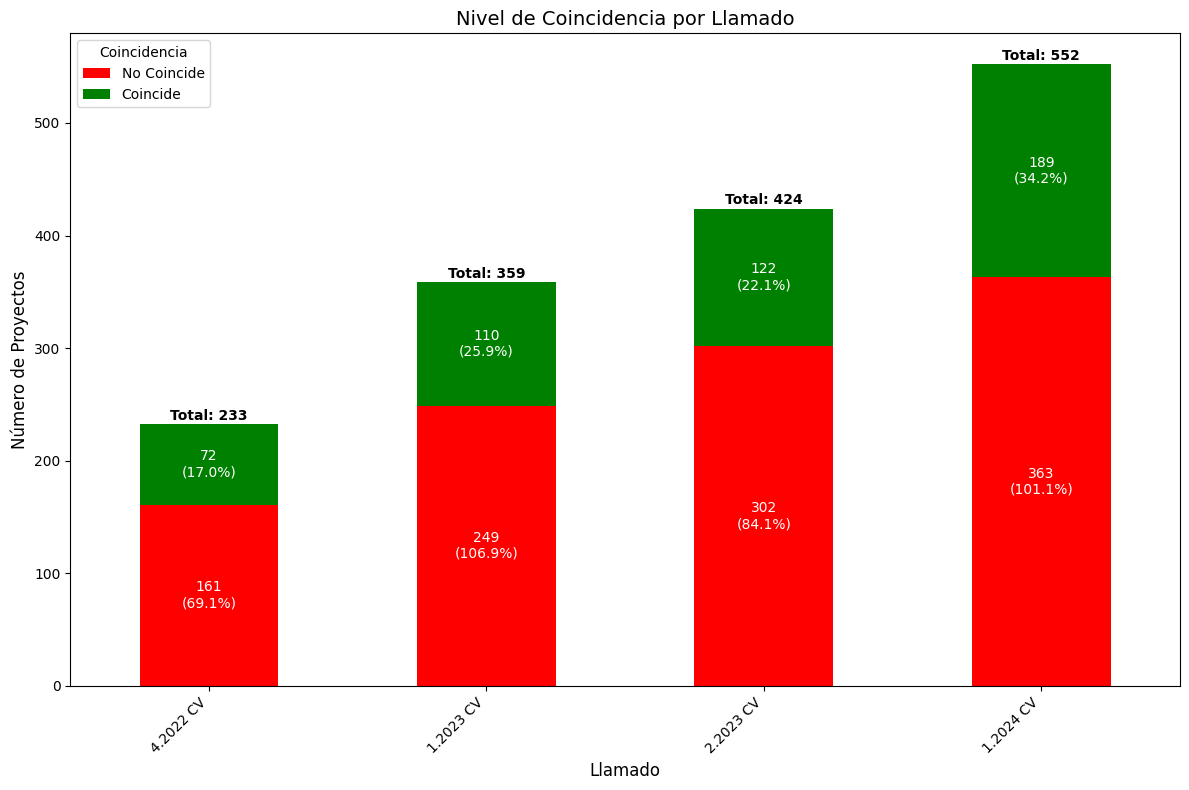

In [15]:
# Agrupar por 'Llamado' y 'Coincide'
df_llamado = df_filtered.groupby(['Llamado', 'Coincide']).size().reset_index(name='Count')

# Pivotar los datos para preparar el gráfico de barras apiladas
df_llamado_pivot = df_llamado.pivot(index='Llamado', columns='Coincide', values='Count').fillna(0)

# Renombrar las columnas para mayor claridad
df_llamado_pivot.columns = ['No Coincide', 'Coincide']

# Calcular totales por fila (llamado)
df_llamado_pivot['Total'] = df_llamado_pivot.sum(axis=1)

# Especificar el orden deseado de los llamados
orden_llamados = ['4.2022 CV', '1.2023 CV', '2.2023 CV', '1.2024 CV']
df_llamado_pivot = df_llamado_pivot.loc[orden_llamados]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
ax = df_llamado_pivot[['No Coincide', 'Coincide']].plot(
    kind='bar', 
    stacked=True, 
    color=['red', 'green'], 
    figsize=(12, 8)
)

# Agregar etiquetas de cantidad y porcentaje sobre las barras
for i, patch in enumerate(ax.patches):
    # Encontrar la posición de las barras (x, y)
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    
    # Índice del Llamado
    index = i // 2  # Cada dos barras corresponde al mismo llamado
    
    # Valores
    total = df_llamado_pivot.iloc[index]['Total']
    value = y
    percentage = (value / total) * 100 if total > 0 else 0
    
    if y > 0:
        ax.text(x, 
                patch.get_y() + y / 2, 
                f'{int(value)}\n({percentage:.1f}%)', 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='white')

# Agregar etiquetas totales sobre cada grupo de barras
for i, total in enumerate(df_llamado_pivot['Total']):
    ax.text(i, 
            total + 1, 
            f'Total: {int(total)}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            fontweight='bold', 
            color='black')

# Ajustar el título y etiquetas
plt.title('Nivel de Coincidencia por Llamado', fontsize=14)
plt.xlabel('Llamado', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para legibilidad
plt.legend(title='Coincidencia', labels=['No Coincide', 'Coincide'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Proyectos que coinciden estado de avance declarado y TRL actual, según tabla de homologación, distribuidos por "Condición de término"

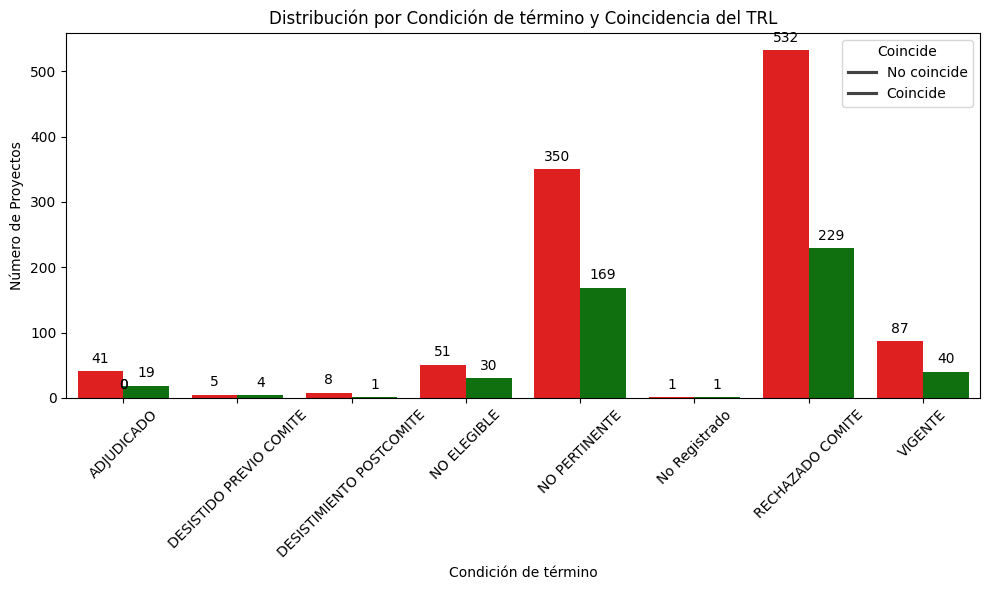


Muestra aleatoria de 10 proyectos:
             Código Nivel actual de desarrollo  \
1700  23CVI2-251474         Producto Funcional   
2350   23CVC-241481            Concepto o idea   
15     23CVI-245807            Concepto o idea   
217    23CVC-245826                  Prototipo   
401    24CVI-264761                  Prototipo   
2431   23CVC-241491                  Prototipo   
638    24CVC-264751        Prototipo Funcional   
1843  23CVC2-251610        Prototipo Funcional   
501    24CVI-264923            Concepto o idea   
1589  23CVI2-251537         Producto Funcional   

                                    Nivel actual de TRL  Coincidencia  \
1700  TRL 9 - Sistema real probado en un entorno ope...         False   
2350              TRL 1 - Principios básicos estudiados          True   
15               TRL 2 - Concepto tecnológico formulado          True   
217           TRL 4 -Tecnología validada en laboratorio          True   
401             TRL 3 - Prueba de concepto exper

In [74]:
# Crear un nuevo DataFrame para el gráfico, agrupando por 'Condición de termino' y 'Coincide'
df_condicion_trl = df_filtered.groupby(['Condición de termino', 'Coincide']).size().reset_index(name='Count')

# Colores personalizados: verde para coincide, rojo para no coincide
palette_colors = {True: 'green', False: 'red'}

# Graficar la distribución por Condición de termino y si coincide o no coincide
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Condición de termino', y='Count', hue='Coincide', data=df_condicion_trl, palette=palette_colors)

# Mostrar el número de proyectos sobre cada barra
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Ajustes del gráfico
plt.title('Distribución por Condición de término y Coincidencia del TRL')
plt.xlabel('Condición de término')
plt.ylabel('Número de Proyectos')
plt.xticks(rotation=45)  # Rotar las etiquetas para que sean legibles
plt.legend(title='Coincide', loc='upper right', labels=['No coincide', 'Coincide'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Muestra aleatoria de 10 proyectos
muestra_proyectos = df_filtered[['Código', '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                 'Nivel actual de TRL', 'Coincide', 'Condición de termino']].sample(10)

# Renombrar las columnas
muestra_proyectos.columns = ['Código', 'Nivel actual de desarrollo', 'Nivel actual de TRL', 'Coincidencia', 'Condición de término']

# Mostrar la muestra aleatoria
print("\nMuestra aleatoria de 10 proyectos:")
print(muestra_proyectos)


### Proyectos que coinciden estado de avance declarado y TRL actual, según tabla de homologación, distribuidos por "Condición de término"

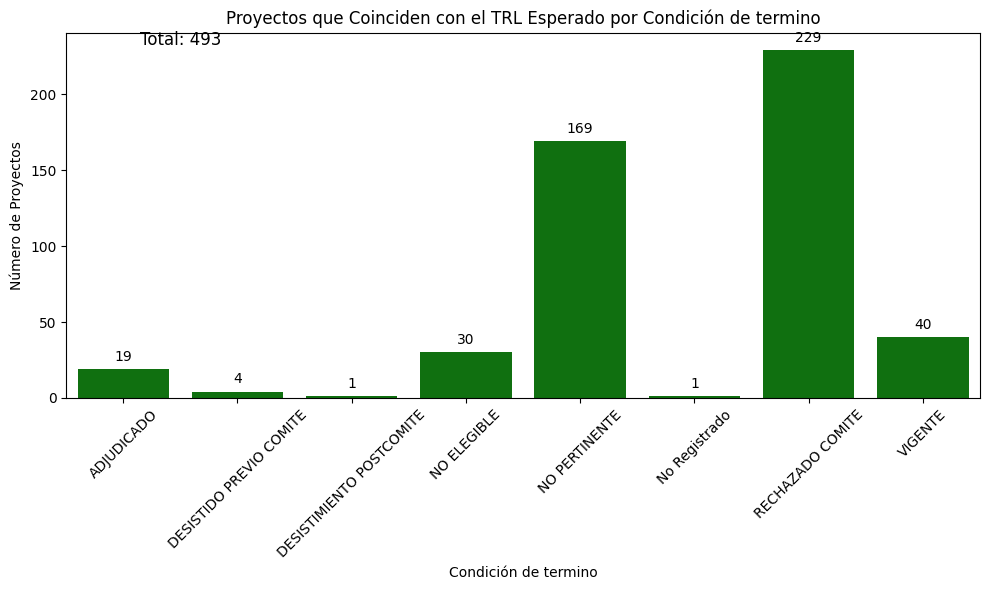

Muestra aleatoria de 10 proyectos que coinciden:
             Código Nivel actual de desarrollo  \
2534   23CVC-241447     Producto Mínimo Viable   
1483  23CVI2-251493                  Prototipo   
2343   23CVI-241471            Concepto o idea   
1653  23CVC2-251419                  Prototipo   
729    24CVI-265015                  Prototipo   
331    23CVI-245677     Producto Mínimo Viable   
1515  23CVI2-251598                  Prototipo   
706    24CVC-264958                  Prototipo   
2473   23CVC-241514                  Prototipo   
663    24CVI-264830                  Prototipo   

                                    Nivel actual de TRL  Coincidencia  \
2534  TRL 6 - Modelo de sistema / subsistema o demos...          True   
1483          TRL 4 -Tecnología validada en laboratorio          True   
2343              TRL 1 - Principios básicos estudiados          True   
1653          TRL 4 -Tecnología validada en laboratorio          True   
729           TRL 4 -Tecnología val

In [75]:
# Separar los datos por los que coinciden
df_coinciden = df_filtered[df_filtered['Coincide'] == True]

# Agrupar los datos por 'Condición de termino' para los que coinciden
df_condicion_coinciden = df_coinciden.groupby('Condición de termino').size().reset_index(name='Count')

# Gráfico: Proyectos que coinciden
plt.figure(figsize=(10, 6))
bar_plot_coinciden = sns.barplot(x='Condición de termino', y='Count', data=df_condicion_coinciden, color='green')

# Mostrar el número de proyectos sobre cada barra para los que coinciden
for p in bar_plot_coinciden.patches:
    bar_plot_coinciden.annotate(f'{int(p.get_height())}', 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Etiqueta de cantidad total de proyectos que coinciden
total_coinciden = len(df_coinciden)  # Total de proyectos que coinciden
bar_plot_coinciden.text(0.5, max(df_condicion_coinciden['Count']) + 1, f'Total: {total_coinciden}', 
                        ha='center', va='bottom', fontsize=12, color='black')

# Ajustes del gráfico de los que coinciden
plt.title('Proyectos que Coinciden con el TRL Esperado por Condición de termino')
plt.xlabel('Condición de termino')
plt.ylabel('Número de Proyectos')
plt.xticks(rotation=45)  # Rotar las etiquetas para que sean legibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar una muestra aleatoria de 10 proyectos que coinciden
muestra_proyectos_coinciden = df_coinciden[['Código', '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                           'Nivel actual de TRL', 'Coincide', 'Condición de termino']].sample(10)

# Renombrar las columnas para mayor claridad
muestra_proyectos_coinciden.columns = ['Código', 'Nivel actual de desarrollo', 'Nivel actual de TRL', 'Coincidencia', 'Condición de termino']

# Mostrar la muestra aleatoria de proyectos que coinciden
print("Muestra aleatoria de 10 proyectos que coinciden:")
print(muestra_proyectos_coinciden)

# Imprimir el total de todos los proyectos que coinciden
print(f"Total de proyectos que coinciden: {total_coinciden}")

### Proyectos que NO coinciden estado de avance declarado y TRL actual, según tabla de homologación, distribuidos por "Condición de término"

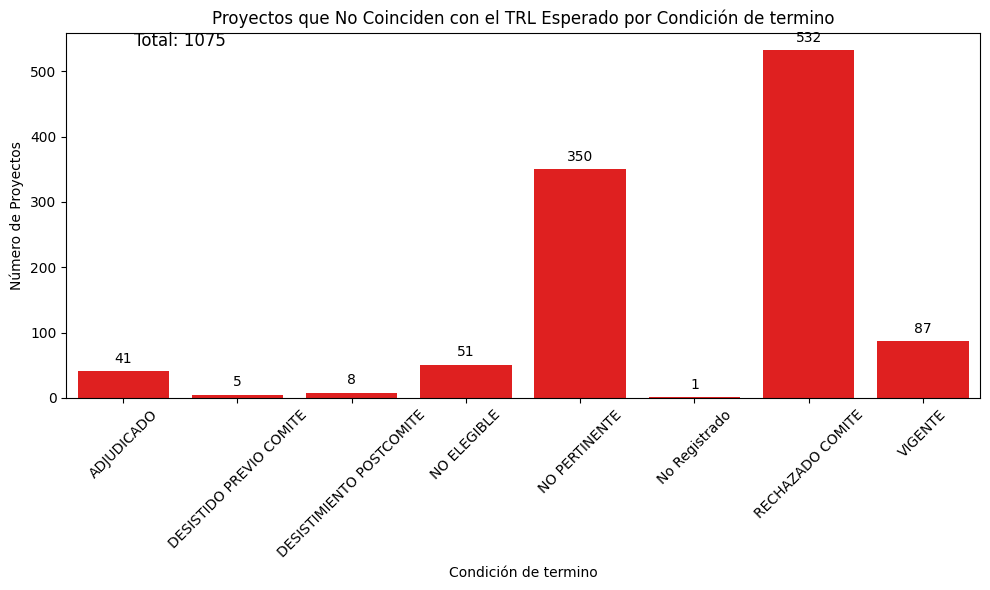

Muestra aleatoria de 10 proyectos que no coinciden:
             Código Nivel actual de desarrollo  \
625    24CVI-264710        Prototipo Funcional   
532    24CVC-265003                  Prototipo   
2379   23CVI-241490        Prototipo Funcional   
526    24CVI-264969        Prototipo Funcional   
466    24CVC-264784                  Prototipo   
2533   23CVC-241441                  Prototipo   
861    24CVI-264873        Prototipo Funcional   
2441   23CVI-241537                  Prototipo   
2319   24CVC-264834                  Prototipo   
1380  23CVI2-251585                  Prototipo   

                                    Nivel actual de TRL  Coincidencia  \
625           TRL 4 -Tecnología validada en laboratorio         False   
532             TRL 3 - Prueba de concepto experimental         False   
2379             TRL 2 - Concepto tecnológico formulado         False   
526             TRL 3 - Prueba de concepto experimental         False   
466             TRL 3 - Prueba d

In [76]:
# Separar los datos por los que no coinciden
df_no_coinciden = df_filtered[df_filtered['Coincide'] == False]

# Agrupar los datos por 'Condición de termino' para los que no coinciden
df_condicion_no_coinciden = df_no_coinciden.groupby('Condición de termino').size().reset_index(name='Count')

# Gráfico 2: Proyectos que no coinciden
plt.figure(figsize=(10, 6))
bar_plot_no_coinciden = sns.barplot(x='Condición de termino', y='Count', data=df_condicion_no_coinciden, color='red')

# Mostrar el número de proyectos sobre cada barra para los que no coinciden
for p in bar_plot_no_coinciden.patches:
    bar_plot_no_coinciden.annotate(f'{int(p.get_height())}', 
                                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Etiqueta de cantidad total de proyectos que no coinciden
total_no_coinciden = len(df_no_coinciden)  # Total de proyectos que no coinciden
bar_plot_no_coinciden.text(0.5, max(df_condicion_no_coinciden['Count']) + 1, f'Total: {total_no_coinciden}', 
                           ha='center', va='bottom', fontsize=12, color='black')

# Ajustes del gráfico de los que no coinciden
plt.title('Proyectos que No Coinciden con el TRL Esperado por Condición de termino')
plt.xlabel('Condición de termino')
plt.ylabel('Número de Proyectos')
plt.xticks(rotation=45)  # Rotar las etiquetas para que sean legibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar una muestra aleatoria de 10 proyectos que no coinciden
muestra_proyectos_no_coinciden = df_no_coinciden[['Código', '¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 
                                                 'Nivel actual de TRL', 'Coincide', 'Condición de termino']].sample(10)

# Renombrar las columnas para mayor claridad
muestra_proyectos_no_coinciden.columns = ['Código', 'Nivel actual de desarrollo', 'Nivel actual de TRL', 'Coincidencia', 'Condición de termino']

# Mostrar la muestra aleatoria de proyectos que no coinciden
print("Muestra aleatoria de 10 proyectos que no coinciden:")
print(muestra_proyectos_no_coinciden)

# Imprimir el total de todos los proyectos que no coinciden
print(f"Total de proyectos que no coinciden: {total_no_coinciden}")

## Ejemplos aleatorios de proyectos

In [7]:
# Mostrar 10 filas aleatorias que coinciden
print("\n10 ejemplos que coinciden:")
coinciden = df_filtered[df_filtered['Coincide']].sample(10)
print(coinciden[['¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 'Nivel actual de TRL']])

# Mostrar 10 filas aleatorias que no coinciden
print("\n10 ejemplos que no coinciden:")
no_coinciden = df_filtered[~df_filtered['Coincide']].sample(10)
print(no_coinciden[['¿Cuál es el nivel actual de desarrollo de su propuesta o solución?', 'Nivel actual de TRL']])


10 ejemplos que coinciden:
     ¿Cuál es el nivel actual de desarrollo de su propuesta o solución?  \
293                                 Prototipo Funcional                   
559                                           Prototipo                   
3                                       Concepto o idea                   
1568                                          Prototipo                   
1499                                          Prototipo                   
596                                           Prototipo                   
2350                                    Concepto o idea                   
1279                                    Concepto o idea                   
346                                  Producto Funcional                   
2534                             Producto Mínimo Viable                   

                                    Nivel actual de TRL  
293   TRL 5 - Tecnología validada en un entorno rele...  
559           TRL 4 -Tecnologí